Zachary Hill <br>
CSPB3022 Intro to Data Science <br>
Project Part 3 <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Wine Sampling

### Project Topic
    This project will look at a data set consisting of wines from three different cultivars and the constituents found in them. This problem will involve classification of the wines to determine which cultivar one came from. The goal will be to take the data set and use statistical analysis so that when a new sample is taken it can be determined which class the sample likely came from.

### Data
    This data comes from the UCI Machine Learning repository and was donated by Stefen Aeberhard. The original data was collected by the Institute of Pharmaceutical and Food Analysis and Technologies in Genoa, Italy. A chemical analysis of wines grown in the same region by three different cultivars was done giving the values of 12 consitutents found in the types of wine.

Aeberhard, S. (1991, July 1). Wine Data Set. UCI Machine Learning Repository: Wine data set. Retrieved November 3, 2022, from https://archive.ics.uci.edu/ml/datasets/Wine 

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer    Science.

    The data set is tabulated in a csv format. It contains 178 samples from 3 different cultivars making up the rows. There are 13 columns making for each of the constituents measured and 1 columnd with the classification of where the sample came from. The 13 constituents are numerical features and where the sample came from is the 1 categorical feature. So the overall data contains 14x178 entries in it.

In [2]:
wines = pd.read_csv('wine.data')
wines.info()
wines.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid Phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of Diluted Wines  178 non-null    float64
 13  Proli

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wines.groupby(['Class']).mean()

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
Class,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


    Grouping the data by each class and taking the mean of each atrribute shows how the wines from each vineyard have different values from eacher other. Looking at the averages shows how it is possible to use these attributes to classify the wines based on which cultivar they came from.
    

### Data Cleaning
    The data is originally very clean so there's not much that needs to be done besides small changes. The original data contained 30 columns but that was reduced to the 13 attributes needed to measure the consituents of the wine. From the info column above it shows that every single attribute has 178 non-null values out of the total 178 samples meaning non of those need to be fixed. 

In [4]:
wines = wines[wines > 0]
wines = wines[wines < 2000]
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid Phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of Diluted Wines  178 non-null    float64
 13  Proli

    The above code checks quickly for if there are any crazy outliers. None of the values should be below 0 as that would not make any sense and anything above 2000 would be unreasonable and would have to be incorrect. None of the rows were removed after checking for this as there are still 178 entries showing the the original data is already well formatted.

### Exploratory Data Analysis

Text(0.5, 1.0, 'Group 3')

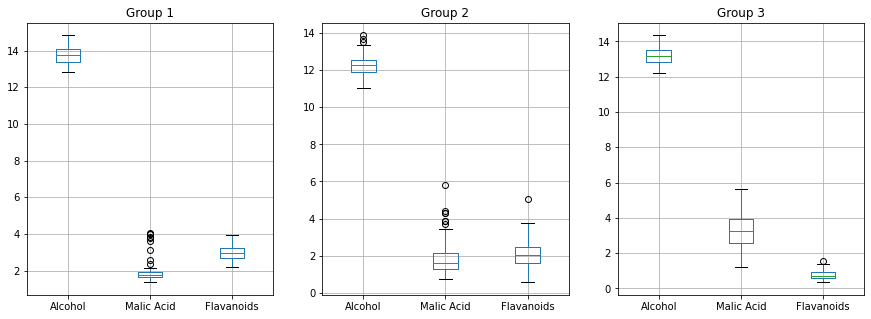

In [5]:
wineone = wines[wines.Class == 1].drop(columns=['Class','Proline','Magnesium'])
winetwo = wines[wines.Class == 2].drop(columns=['Class','Proline','Magnesium'])
winethree = wines[wines.Class == 3].drop(columns=['Class','Proline','Magnesium'])

fig,axs = plt.subplots(1,3,figsize=(15,5))
wineone.boxplot(column=['Alcohol','Malic Acid','Flavanoids'], ax=axs[0])
winetwo.boxplot(column=['Alcohol','Malic Acid','Flavanoids'], ax=axs[1])
winethree.boxplot(column=['Alcohol','Malic Acid','Flavanoids'], ax=axs[2])
axs[0].set_title('Group 1')
axs[1].set_title('Group 2')
axs[2].set_title('Group 3')

    The above box plots look at 3 attributes of the different groups of wine to see how much each group overlaps with the others. It splits the dataframe into dataframes for each of the 3 classes. It then does a boxplot of attributes that could be interesting for the classification proocess for every group. For the classification we want to focus on attributes where the boxes between the groups do not overlap. If they overlap too much it makes it more difficult to get a correct classification as errors could happen due to deviation.

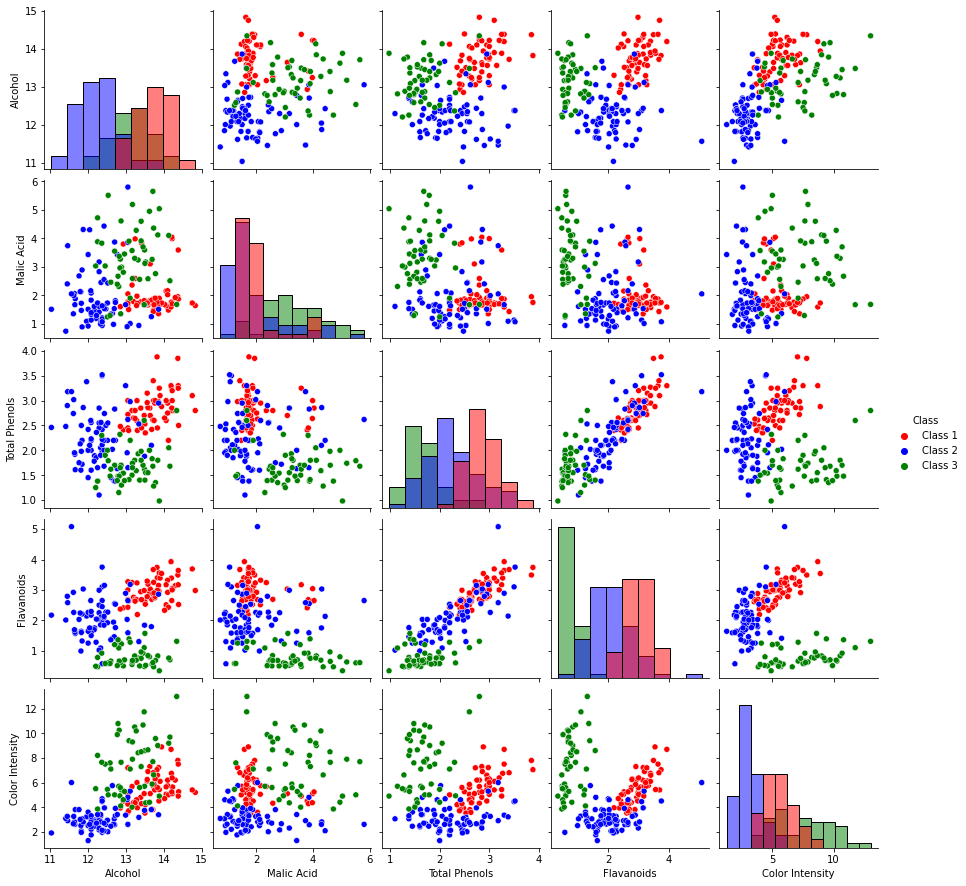

In [6]:
import seaborn as sns

#make the dataframe smaller so it can run the plot without crashing
wineonesmall = wineone[['Alcohol','Malic Acid','Total Phenols','Flavanoids','Color Intensity']]
winetwosmall = winetwo[['Alcohol','Malic Acid','Total Phenols','Flavanoids','Color Intensity']]
winethreesmall = winethree[['Alcohol','Malic Acid','Total Phenols','Flavanoids','Color Intensity']]

sns.pairplot(pd.concat([wineonesmall.assign(Class='Class 1'), winetwosmall.assign(Class='Class 2'), winethreesmall.assign(Class='Class 3')]),diag_kind='hist',hue='Class',palette=['r','b','g'])


    The above is a scatter plot matrix where each group is split into their respective classes by the colors on the chart. Only 5 attributes were used here instead of all 13 as it starts to become difficult to run and gets more visually cluttered. The attributes were picked to try and find the ones that would create the most distinct clusters. If there were no disinct clusters and the the points seemed random it would mean the three groups are not distinct enough to seperate. It looks like the different wines cluster together so that means it should be possible to classify them into groups using a model.

### Models
    Starting off the data needs to be divided into a training and testing set so one can be used to make the model fit and the other can test the accuracy

In [7]:
wines_training = wines[::2]
wines_testing = wines [1::2]

    I think the graph for alcohol and total phenols provides one of the better visualizations of the data so that will be used to provide a 2D plot. However the model will use different parameters than the visualization depending on which parameters provide the best results. Below is a graph of the actual data points for comparison with the model later

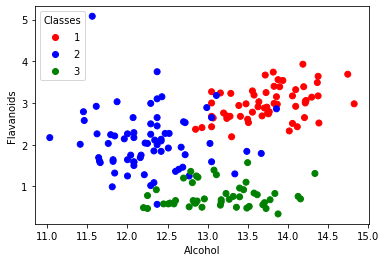

In [8]:
from matplotlib.lines import Line2D
colors = ['red','blue','green']
true_scatter = plt.scatter(wines['Alcohol'].to_numpy(),wines['Flavanoids'].to_numpy(),c=wines['Class'].to_numpy(), cmap=matplotlib.colors.ListedColormap(colors))
plt.legend(*true_scatter.legend_elements(), title = "Classes")
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.show()

    To make the model to predict the class logitsitc regression will be used adding in more parameters using a forward step refinement. A parameter will be chosen based on whichever one gives the best score on the test data.

In [9]:
import sklearn.linear_model
#split the classes and the parameters into their own arrays
wines_training_class = wines_training['Class'].to_numpy()
wines_testing_class = wines_testing['Class'].to_numpy()
wines_training_parameters = wines_training.drop(columns = 'Class')
wines_testing_parameters = wines_testing.drop(columns = 'Class')
ilr = sklearn.linear_model.LogisticRegression(max_iter=2000)
#iterate through the parameters fitting the model to the training data and testing the score on the test data
for parameter in wines_training_parameters:
    param_array = wines_training_parameters[parameter].to_numpy()
    wines_model = ilr.fit(param_array.reshape(-1,1), wines_training_class)
    #test the model prediction on the training data and the testing data
    train_score = wines_model.score(param_array.reshape(-1,1), wines_training_class)
    test_score = wines_model.score(wines_testing_parameters[parameter].to_numpy().reshape(-1,1), wines_testing_class)
    print(parameter)
    print('Training score: ' + f'{train_score:.3f}')
    print('Testing score: ' + f'{test_score:.3f}')

Alcohol
Training score: 0.652
Testing score: 0.663
Malic Acid
Training score: 0.517
Testing score: 0.539
Ash
Training score: 0.449
Testing score: 0.506
Alcalinity of Ash
Training score: 0.573
Testing score: 0.528
Magnesium
Training score: 0.517
Testing score: 0.528
Total Phenols
Training score: 0.652
Testing score: 0.640
Flavanoids
Training score: 0.831
Testing score: 0.787
Nonflavanoid Phenols
Training score: 0.360
Testing score: 0.472
Proanthocyanins
Training score: 0.528
Testing score: 0.539
Color Intensity
Training score: 0.753
Testing score: 0.719
Hue
Training score: 0.494
Testing score: 0.551
OD280/OD315 of Diluted Wines
Training score: 0.640
Testing score: 0.607
Proline
Training score: 0.652
Testing score: 0.719


    From the above test the flavanoids parameter gave the best testing score as well as the best training score so that will be the first parameter used in the model. Plotting a plot of the predictions given by the model gives the following:

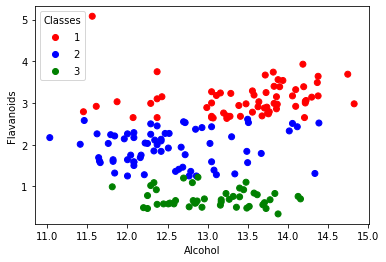

In [10]:
first_model = ilr.fit(wines_training_parameters['Flavanoids'].to_numpy().reshape(-1,1),wines_training_class)
#use the model to predict all the values for both the test and training data
wines_hat = first_model.predict(wines['Flavanoids'].to_numpy().reshape(-1,1))
true_scatter = plt.scatter(wines['Alcohol'].to_numpy(),wines['Flavanoids'].to_numpy(),c=wines_hat, cmap=matplotlib.colors.ListedColormap(colors))
plt.legend(*true_scatter.legend_elements(), title = "Classes")
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.show()

    As seen above the model prediction looks off from the true values in the original plot. It can be seen since the only parameter being used is the same one for the y-axis visualizaion there's a clear boundary based on the axis . To make it more accurate the next step will be done adding another parameter to the flavanoids one.

In [11]:
from sklearn import preprocessing
columns = list(wines.columns)
columns.remove('Class')
columns.remove('Flavanoids')
#repeat the same loop as before but this time with flavanoids already added
for parameter in columns:
    param_array = wines_training_parameters[['Flavanoids',parameter]].to_numpy()
    wines_model = ilr.fit(param_array, wines_training_class)
    #test the model prediction on the training data and the testing data
    train_score = wines_model.score(param_array, wines_training_class)
    test_score = wines_model.score(wines_testing_parameters[['Flavanoids',parameter]].to_numpy(), wines_testing_class)
    print(parameter)
    print('Training score: ' + f'{train_score:.3f}')
    print('Testing score: ' + f'{test_score:.3f}')

Alcohol
Training score: 0.944
Testing score: 0.921
Malic Acid
Training score: 0.831
Testing score: 0.753
Ash
Training score: 0.876
Testing score: 0.787
Alcalinity of Ash
Training score: 0.888
Testing score: 0.775
Magnesium
Training score: 0.854
Testing score: 0.843
Total Phenols
Training score: 0.809
Testing score: 0.787
Nonflavanoid Phenols
Training score: 0.843
Testing score: 0.787
Proanthocyanins
Training score: 0.843
Testing score: 0.753
Color Intensity
Training score: 0.899
Testing score: 0.899
Hue
Training score: 0.865
Testing score: 0.809
OD280/OD315 of Diluted Wines
Training score: 0.865
Testing score: 0.798
Proline
Training score: 0.910
Testing score: 0.910


    For this one alcohol had the highest testing score. Going up to 0.921 that will be the next parameter added.

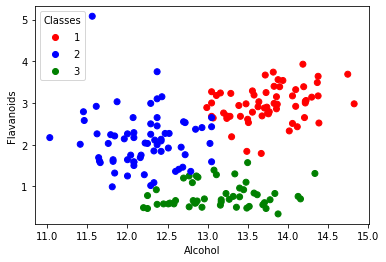

In [12]:
second_model = ilr.fit(wines_training_parameters[['Flavanoids','Alcohol']].to_numpy(),wines_training_class)
#use the model to predict all the values for both the test and training data
wines_hat = second_model.predict(wines[['Flavanoids','Alcohol']].to_numpy())
true_scatter = plt.scatter(wines['Alcohol'].to_numpy(),wines['Flavanoids'].to_numpy(),c=wines_hat, cmap=matplotlib.colors.ListedColormap(colors))
plt.legend(*true_scatter.legend_elements(), title = "Classes")
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.show()

    This plot is looking more like the actual data now with 2 parameters. They also happen to be the same two parameters I selected based on the visual data analysis done earlier so it seems like that was an accurate estimation. Next is testing if adding a third parameter makes the prediction better

In [13]:
columns.remove('Alcohol')
#repeat the same loop as before but this time with flavanoids already added
for parameter in columns:
    param_array = wines_training_parameters[['Flavanoids','Alcohol',parameter]].to_numpy()
    wines_model = ilr.fit(param_array, wines_training_class)
    #test the model prediction on the training data and the testing data
    train_score = wines_model.score(param_array, wines_training_class)
    test_score = wines_model.score(wines_testing_parameters[['Flavanoids','Alcohol',parameter]].to_numpy(), wines_testing_class)
    print(parameter)
    print('Training score: ' + f'{train_score:.3f}')
    print('Testing score: ' + f'{test_score:.3f}')

Malic Acid
Training score: 0.933
Testing score: 0.921
Ash
Training score: 0.966
Testing score: 0.933
Alcalinity of Ash
Training score: 0.933
Testing score: 0.933
Magnesium
Training score: 0.944
Testing score: 0.888
Total Phenols
Training score: 0.933
Testing score: 0.921
Nonflavanoid Phenols
Training score: 0.944
Testing score: 0.910
Proanthocyanins
Training score: 0.955
Testing score: 0.888
Color Intensity
Training score: 0.955
Testing score: 0.899
Hue
Training score: 0.933
Testing score: 0.910
OD280/OD315 of Diluted Wines
Training score: 0.921
Testing score: 0.899
Proline
Training score: 0.955
Testing score: 0.921


    Ash was the best parameter added so that's getting added to the next iteration of the model:

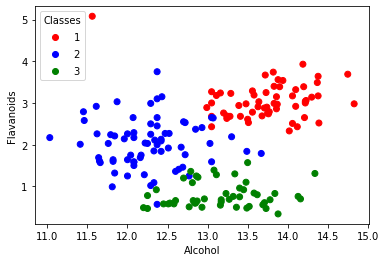

In [14]:
third_model = ilr.fit(wines_training_parameters[['Flavanoids','Alcohol','Ash']].to_numpy(),wines_training_class)
#use the model to predict all the values for both the test and training data
wines_hat = third_model.predict(wines[['Flavanoids','Alcohol','Ash']].to_numpy())
true_scatter = plt.scatter(wines['Alcohol'].to_numpy(),wines['Flavanoids'].to_numpy(),c=wines_hat, cmap=matplotlib.colors.ListedColormap(colors))
plt.legend(*true_scatter.legend_elements(), title = "Classes")
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.show()

    This is getting closer and closer to the correct classification of the wines with three parameters. Time to see if adding a forth continues to improve the test.

In [15]:
columns.remove('Ash')
#repeat the same loop as before but this time with flavanoids already added
for parameter in columns:
    param_array = wines_training_parameters[['Flavanoids','Alcohol','Ash',parameter]].to_numpy()
    wines_model = ilr.fit(param_array, wines_training_class)
    #test the model prediction on the training data and the testing data
    train_score = wines_model.score(param_array, wines_training_class)
    test_score = wines_model.score(wines_testing_parameters[['Flavanoids','Alcohol','Ash',parameter]].to_numpy(), wines_testing_class)
    print(parameter)
    print('Training score: ' + f'{train_score:.3f}')
    print('Testing score: ' + f'{test_score:.3f}')

Malic Acid
Training score: 0.955
Testing score: 0.910
Alcalinity of Ash
Training score: 0.944
Testing score: 0.966
Magnesium
Training score: 0.955
Testing score: 0.910
Total Phenols
Training score: 0.955
Testing score: 0.921
Nonflavanoid Phenols
Training score: 0.966
Testing score: 0.933
Proanthocyanins
Training score: 0.966
Testing score: 0.910
Color Intensity
Training score: 0.966
Testing score: 0.933
Hue
Training score: 0.978
Testing score: 0.921
OD280/OD315 of Diluted Wines
Training score: 0.955
Testing score: 0.933
Proline
Training score: 0.978
Testing score: 0.933


    This one is odd because the alcalinity of ash had the highest testing score but the training score actually went down from the previous model. So this addition might be overfitting the model at this point.

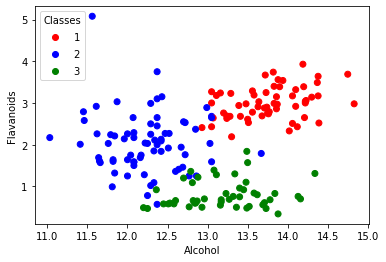

In [16]:
fourth_model = ilr.fit(wines_training_parameters[['Flavanoids','Alcohol','Ash','Alcalinity of Ash']].to_numpy(),wines_training_class)
#use the model to predict all the values for both the test and training data
wines_hat = fourth_model.predict(wines[['Flavanoids','Alcohol','Ash','Alcalinity of Ash']].to_numpy())
true_scatter = plt.scatter(wines['Alcohol'].to_numpy(),wines['Flavanoids'].to_numpy(),c=wines_hat, cmap=matplotlib.colors.ListedColormap(colors))
plt.legend(*true_scatter.legend_elements(), title = "Classes")
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.show()

    One more parameter could probably be added next but it likely won't change the prediction very much and could reduce accuracy from overfitting

In [17]:
columns.remove('Alcalinity of Ash')
#repeat the same loop as before but this time with flavanoids already added
for parameter in columns:
    param_array = wines_training_parameters[['Flavanoids','Alcohol','Ash','Alcalinity of Ash',parameter]].to_numpy()
    wines_model = ilr.fit(param_array, wines_training_class)
    #test the model prediction on the training data and the testing data
    train_score = wines_model.score(param_array, wines_training_class)
    test_score = wines_model.score(wines_testing_parameters[['Flavanoids','Alcohol','Ash','Alcalinity of Ash',parameter]].to_numpy(), wines_testing_class)
    print(parameter)
    print('Training score: ' + f'{train_score:.3f}')
    print('Testing score: ' + f'{test_score:.3f}')

Malic Acid
Training score: 0.966
Testing score: 0.944
Magnesium
Training score: 0.978
Testing score: 0.933
Total Phenols
Training score: 0.955
Testing score: 0.955
Nonflavanoid Phenols
Training score: 0.944
Testing score: 0.966
Proanthocyanins
Training score: 0.944
Testing score: 0.966
Color Intensity
Training score: 0.966
Testing score: 0.921
Hue
Training score: 0.978
Testing score: 0.955
OD280/OD315 of Diluted Wines
Training score: 0.966
Testing score: 0.966
Proline
Training score: 0.944
Testing score: 0.944


    It seems like the model is really at its limit for improvements as none of the testing scores increased. OD280/OD315 of Diluted Wines will be chosen for the final model graph as it has the highest average between the testing and training scores.

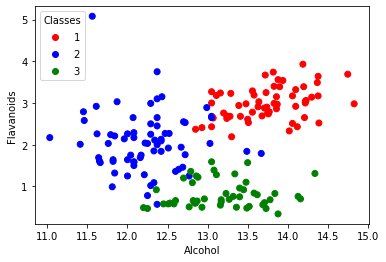

In [18]:
fifth_model = ilr.fit(wines_training_parameters[['Flavanoids','Alcohol','Ash','Alcalinity of Ash','OD280/OD315 of Diluted Wines']].to_numpy(),wines_training_class)
#use the model to predict all the values for both the test and training data
wines_hat = fifth_model.predict(wines[['Flavanoids','Alcohol','Ash','Alcalinity of Ash','OD280/OD315 of Diluted Wines']].to_numpy())
true_scatter = plt.scatter(wines['Alcohol'].to_numpy(),wines['Flavanoids'].to_numpy(),c=wines_hat, cmap=matplotlib.colors.ListedColormap(colors))
plt.legend(*true_scatter.legend_elements(), title = "Classes")
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.show()

    This will be used for the final model and it appears to come close to and accurate prediction of the true data

### Results and Analysis

    The final logistic model used is based on Flavanoids, Alcohol, Ash, Alcalinity of Ash, and OD280/OD315 of Diluted Wines. A side by side comparison of the data is shown below to give an idea of how well the model predicts the category of wine compared to the true values. The average score of the model was 0.966 so only a few points will be off compared to the real data.

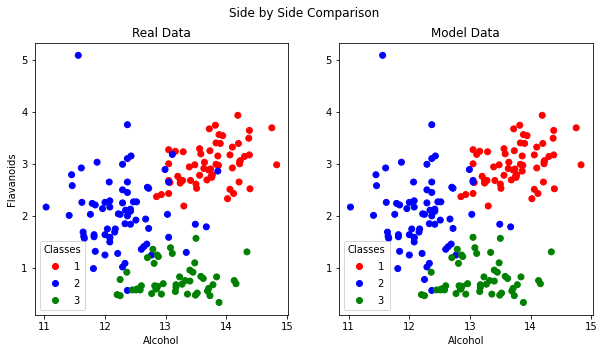

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Side by Side Comparison')
true_scatter = ax1.scatter(wines['Alcohol'].to_numpy(),wines['Flavanoids'].to_numpy(),c=wines['Class'].to_numpy(), cmap=matplotlib.colors.ListedColormap(colors))
ax1.legend(*true_scatter.legend_elements(), title = "Classes")
model_scatter = ax2.scatter(wines['Alcohol'].to_numpy(),wines['Flavanoids'].to_numpy(),c=wines_hat, cmap=matplotlib.colors.ListedColormap(colors))
ax2.legend(*model_scatter.legend_elements(), title = "Classes")
ax1.title.set_text('Real Data')
ax2.title.set_text('Model Data')
ax1.set(xlabel='Alcohol', ylabel='Flavanoids')
ax2.set(xlabel='Alcohol')
fig.show()

    As seen above only a few of the points end up being different in our model compared to the real data. It mostlyy fails to predict points that end up far from the rest of the points on the alcohol and flavanoid scale. The extra parameters catches some of the samples but some of them are just too far from the normal deviation of the models parameters. To see which ones were the most commmon mistakes in the model a confusion matrix can be made as follows:

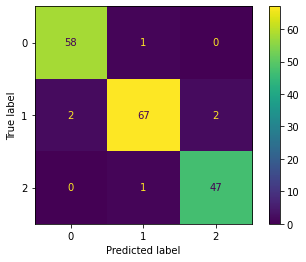

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
wines_true = wines['Class'].to_numpy()
cm = confusion_matrix(wines_true,wines_hat)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

    The above matrix diplays what predictons the model was making and how many of them were falsely predicted. 0 is our first class of wine and the model predicted 56 correctly but mistook 3 of them for class 2. 1 is the second class of wine and has the most samples at 71. It correctly predicted 63 as class 2 but labeled 5 as class 1 and 3 as class 2. The last class of 3 was the most accurate correctly predcicting 47 of them and only labeling 1 falsely. In the topright and bottomleft corencers there are 0 failed predictons most likely as class 1 and class 3 were easily differentiated from each other. Moving on the the results of the iterative process of adding parameters to our model the below plot shows how the testing and training scores changed as more degrees of freedom were added.

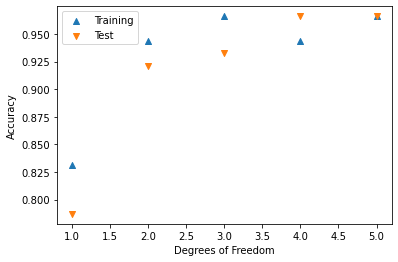

In [21]:
dof = [1,2,3,4,5]
training_scores = [0.831,0.944,0.966,0.944,0.966]
test_scores = [0.787,0.921,0.933,0.966,0.966]
plt.scatter(dof,training_scores, marker = '^', label = 'Training')
plt.scatter(dof,test_scores, marker = 'v', label = 'Test')
plt.xlabel('Degrees of Freedom')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

    The above shows how as more parameters were added to the model the accuracy of the training and testing changed. Starting off both are very low as only 1 parameter is being used. Adding a 2nd parameter already makes the model very good at predicting the and adding a few more continues the trend of increasing accuracy. At 4 DOF the test accurucy seems to be hitting its highest values and adding more parameters afterwards did not increase it. If more parameters were added to the model it would cause the training accurucary to get perfect but the accuracy of the testing prediction would start going down as the model would be overfitted to the training data.

### Conclusion
    Overall I found how accurate the model seemed to be at 0.966 to be nice. I think it comes down to how nice the data collected initially was. It was very well documented so I only had to check how clean it was and it seems like good data is the most important part of the analysis. Having poorly formatted data or data that didn't contain enough paramaters to make a good model seems like it would make the project much more difficult to work with. I also got to understand better why having a training data set and a testing data set is used for creating a model. Seeing the graphs as the training accuracy keeps increasing but the testing accuracy hits an upper limit and starts to get worse after too many parameters are added is a good learning experience. I think to continue to improve upon this project I would want to look at other models instead of just logistic regression. I would want to test if using a different model comes up with the same parameters as this one. Or if using these parameters on a different model produces similar levels of accuracy. This was an interesting project to work on overall.